# 오버워치 2 점수판 분석 AI

In [1]:
import pandas as pd
from os import path
import joblib

players = 10


def prepare_scoreboards(defeat_, victory_):
    scoreboards_ = pd.concat([defeat_, victory_])
    scoreboards_.set_index(
        pd.Index((i, j) for i in range(len(scoreboards_.index) // players) for j in range(players)), inplace=True
    )
    return scoreboards_


datapath = path.join('datasets', '')
range_ = range(3, 10)
defeat = pd.read_csv(datapath + 'role_defeat.csv', usecols=range_)
victory = pd.read_csv(datapath + 'role_victory.csv', usecols=range_)
scoreboards = prepare_scoreboards(defeat, victory)
d_max = scoreboards['D'].max()
joblib.dump(d_max, 'max.joblib')
scoreboards.loc[
    (
            scoreboards['E'] == 0
    ) & (
            scoreboards['A'] == 0
    ) & (
            scoreboards['D'] == 0
    ) & (
            scoreboards['DMG'] == 0
    ) & (
            scoreboards['H'] == 0
    ) & (
            scoreboards['MIT'] == 0
    ), 'D'
] = d_max
scoreboards

E   A   D    DMG      H    MIT    GAME
0   0  24   9   5   9021      0  10517  DEFEAT
    1  17   0  11   7114      0    406  DEFEAT
    2  19   9   8   5749   1336   1266  DEFEAT
    3   7  17  11   1260   8133    237  DEFEAT
    4   9  17  10   1862   8773    113  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
824 5  12   1   6  10194      0  13539  DEFEAT
    6  11   0  10   8942    467    147  DEFEAT
    7  11   3  12   6593    415      0  DEFEAT
    8   5   7   4   2534  13197    689  DEFEAT
    9   3   6   7   3790   9426   2477  DEFEAT

[8250 rows x 7 columns]

In [2]:
scoreboards.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 8250 entries, (0, 0) to (824, 9)
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   E       8250 non-null   int64 
 1   A       8250 non-null   int64 
 2   D       8250 non-null   int64 
 3   DMG     8250 non-null   int64 
 4   H       8250 non-null   int64 
 5   MIT     8250 non-null   int64 
 6   GAME    8250 non-null   object
dtypes: int64(6), object(1)
memory usage: 514.5+ KB


In [3]:
scoreboards.describe()

,E,A,D,DMG,H,MIT
count,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000,8250.000000
mean,14.397212,7.360606,6.540606,6725.830061,3816.879758,2272.345212
std,9.318669,8.117412,3.776019,4434.175358,4991.930645,4404.405201
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,4.000000,3229.000000,0.000000,0.000000
50%,13.000000,4.000000,6.000000,6086.500000,699.500000,367.000000
75%,20.000000,12.000000,9.000000,9583.000000,7310.750000,1888.750000
max,58.000000,62.000000,23.000000,29922.000000,26419.000000,41849.000000


In [4]:
import matplotlib as mpl
import os
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
IMAGES_PATH = path.join('.', 'images')
os.makedirs(IMAGES_PATH, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print('그림 저장:' + fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, dpi=resolution, format=fig_extension)

In [5]:
scoreboards

E   A   D    DMG      H    MIT    GAME
0   0  24   9   5   9021      0  10517  DEFEAT
    1  17   0  11   7114      0    406  DEFEAT
    2  19   9   8   5749   1336   1266  DEFEAT
    3   7  17  11   1260   8133    237  DEFEAT
    4   9  17  10   1862   8773    113  DEFEAT
...    ..  ..  ..    ...    ...    ...     ...
824 5  12   1   6  10194      0  13539  DEFEAT
    6  11   0  10   8942    467    147  DEFEAT
    7  11   3  12   6593    415      0  DEFEAT
    8   5   7   4   2534  13197    689  DEFEAT
    9   3   6   7   3790   9426   2477  DEFEAT

[8250 rows x 7 columns]

In [6]:
tank = pd.concat([scoreboards[::players], scoreboards[5::players]])
damage = pd.concat([scoreboards[1::players], scoreboards[2::players], scoreboards[6::players], scoreboards[7::players]])
support = pd.concat(
    [scoreboards[3::players], scoreboards[4::players], scoreboards[8::players], scoreboards[9::players]]
)

In [7]:
tank.describe()

,E,A,D,DMG,H,MIT
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,18.157576,4.368485,6.328485,9688.287273,481.015758,9223.786667
std,9.655215,3.581500,3.672952,4228.921139,1224.191409,5762.904175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,4.000000,6615.500000,0.000000,5086.500000
50%,18.000000,4.000000,6.000000,9293.000000,0.000000,8106.000000
75%,24.000000,6.000000,8.000000,12392.750000,347.750000,12269.250000
max,58.000000,28.000000,23.000000,27480.000000,15168.000000,41849.000000


In [8]:
damage.describe()

,E,A,D,DMG,H,MIT
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,17.557879,1.932727,7.164242,8691.652727,296.785758,568.859091
std,8.961978,2.526193,3.983026,3817.174570,516.530689,1006.900696
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,4.000000,5897.000000,0.000000,0.000000
50%,17.000000,1.000000,7.000000,8306.000000,0.000000,88.000000
75%,23.000000,3.000000,9.000000,11030.000000,415.250000,755.000000
max,56.000000,16.000000,23.000000,29922.000000,3353.000000,9682.000000


In [9]:
support.describe()

,E,A,D,DMG,H,MIT
count,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000,3300.000000
mean,9.356364,14.284545,6.023030,3278.778788,9004.905758,500.110606
std,6.909121,8.370400,3.516395,2347.960524,4050.875098,823.608140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,8.000000,4.000000,1604.750000,6086.750000,0.000000
50%,8.000000,14.000000,6.000000,2914.500000,8538.000000,215.000000
75%,14.000000,19.000000,8.000000,4492.250000,11468.500000,651.000000
max,48.000000,62.000000,23.000000,15946.000000,26419.000000,7778.000000


그림 저장:tank_hist


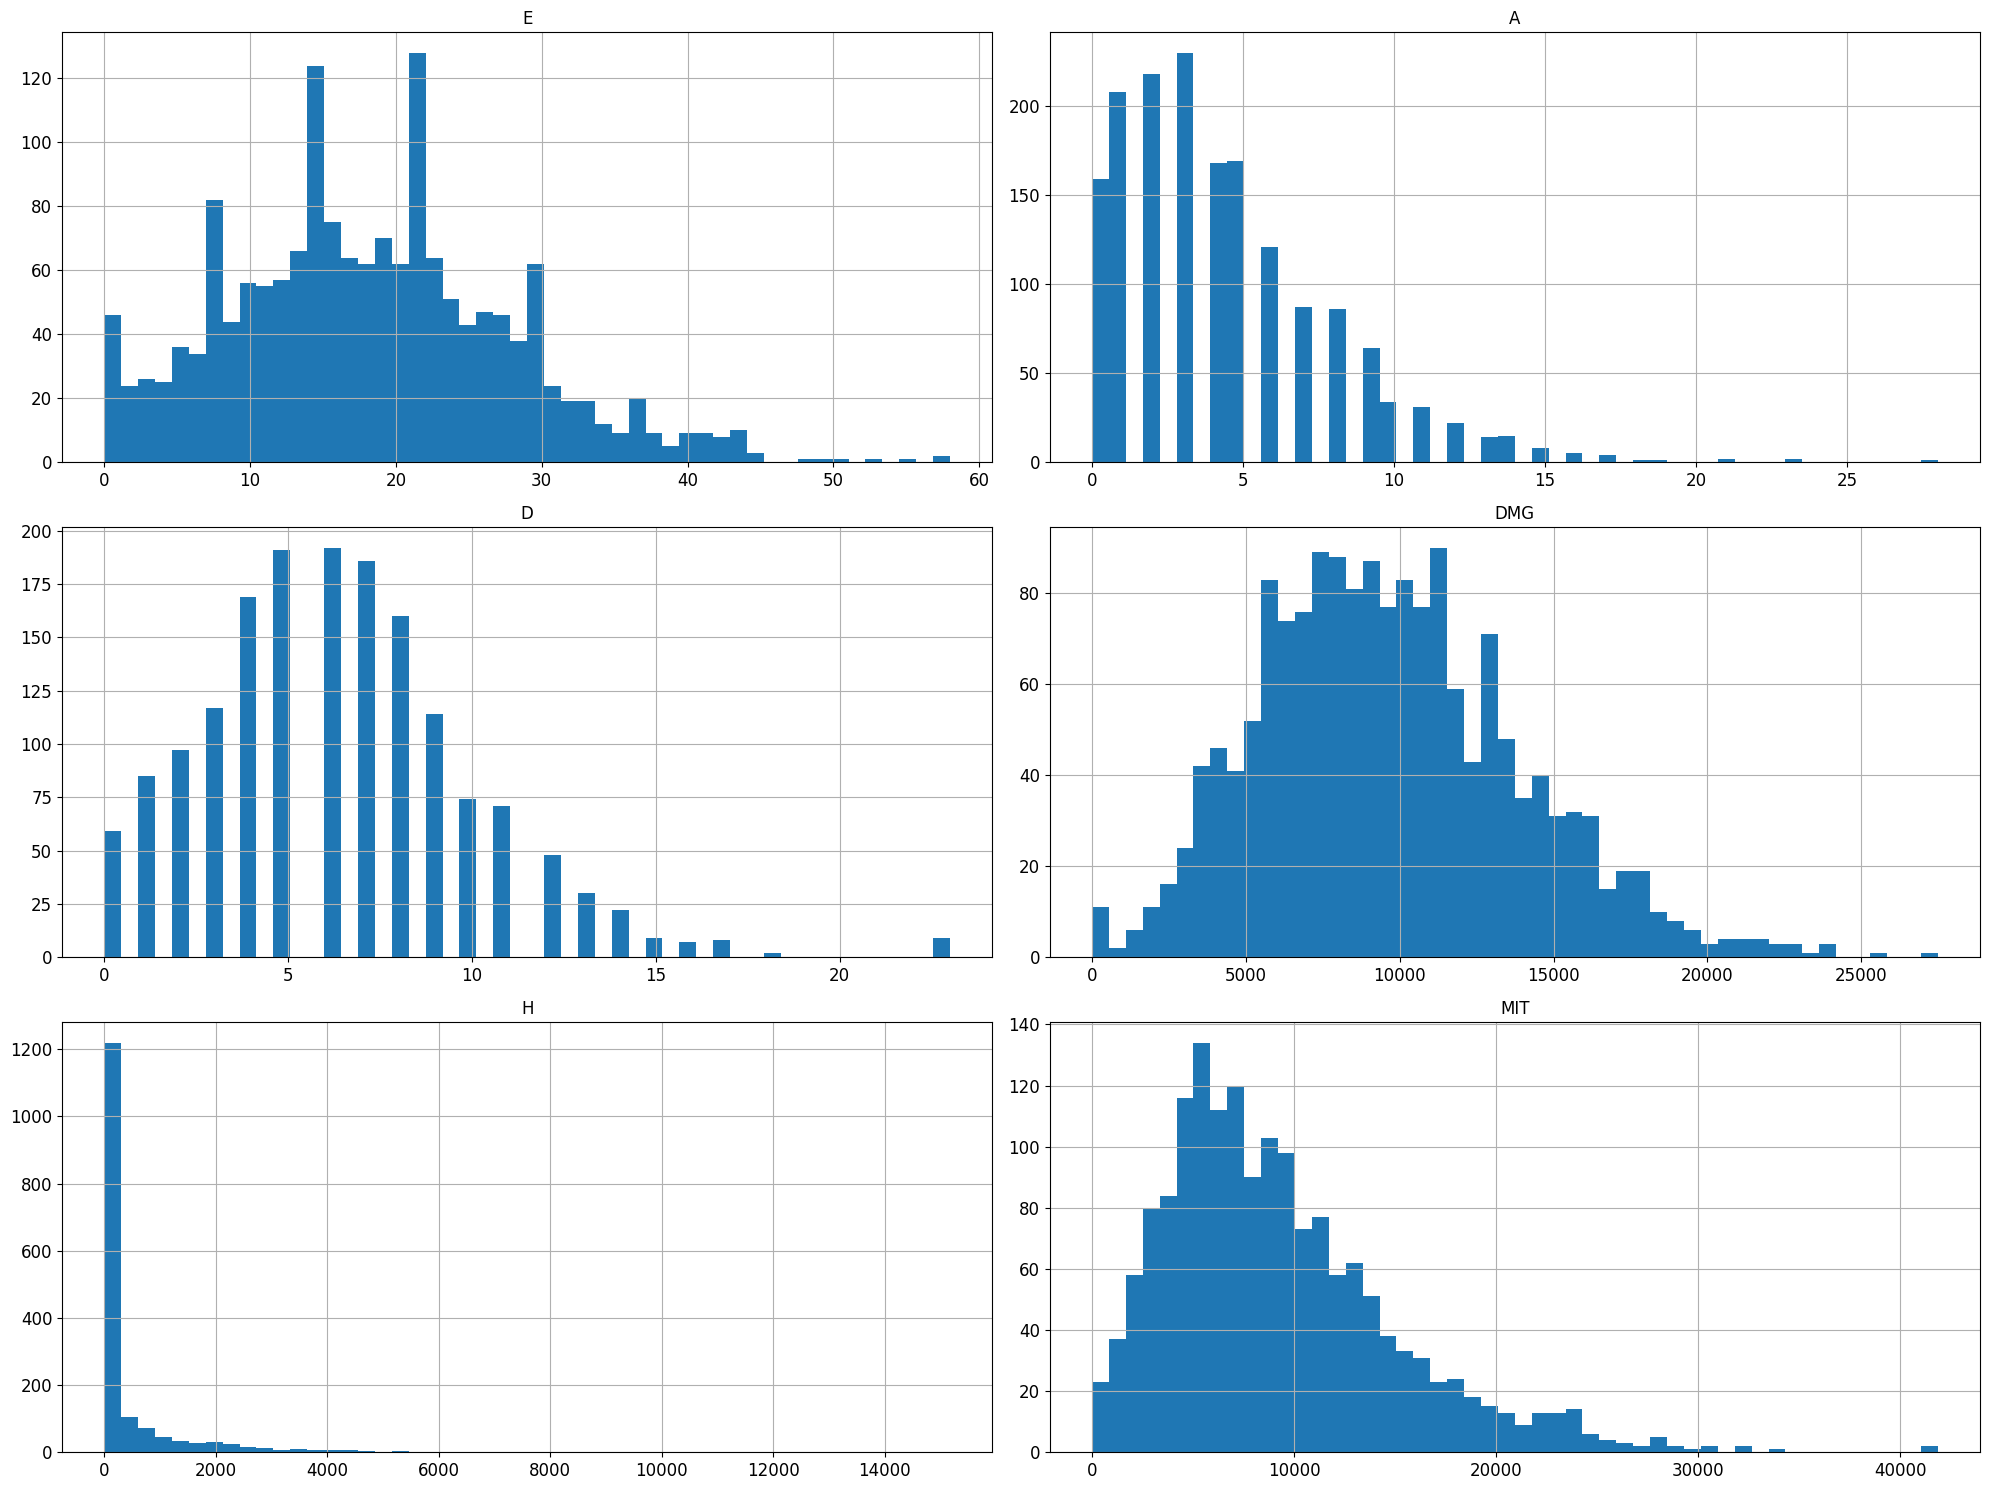

In [10]:
tank.hist(bins=50, figsize=(20, 15))
save_fig('tank_hist')
plt.show()

그림 저장:damage_hist


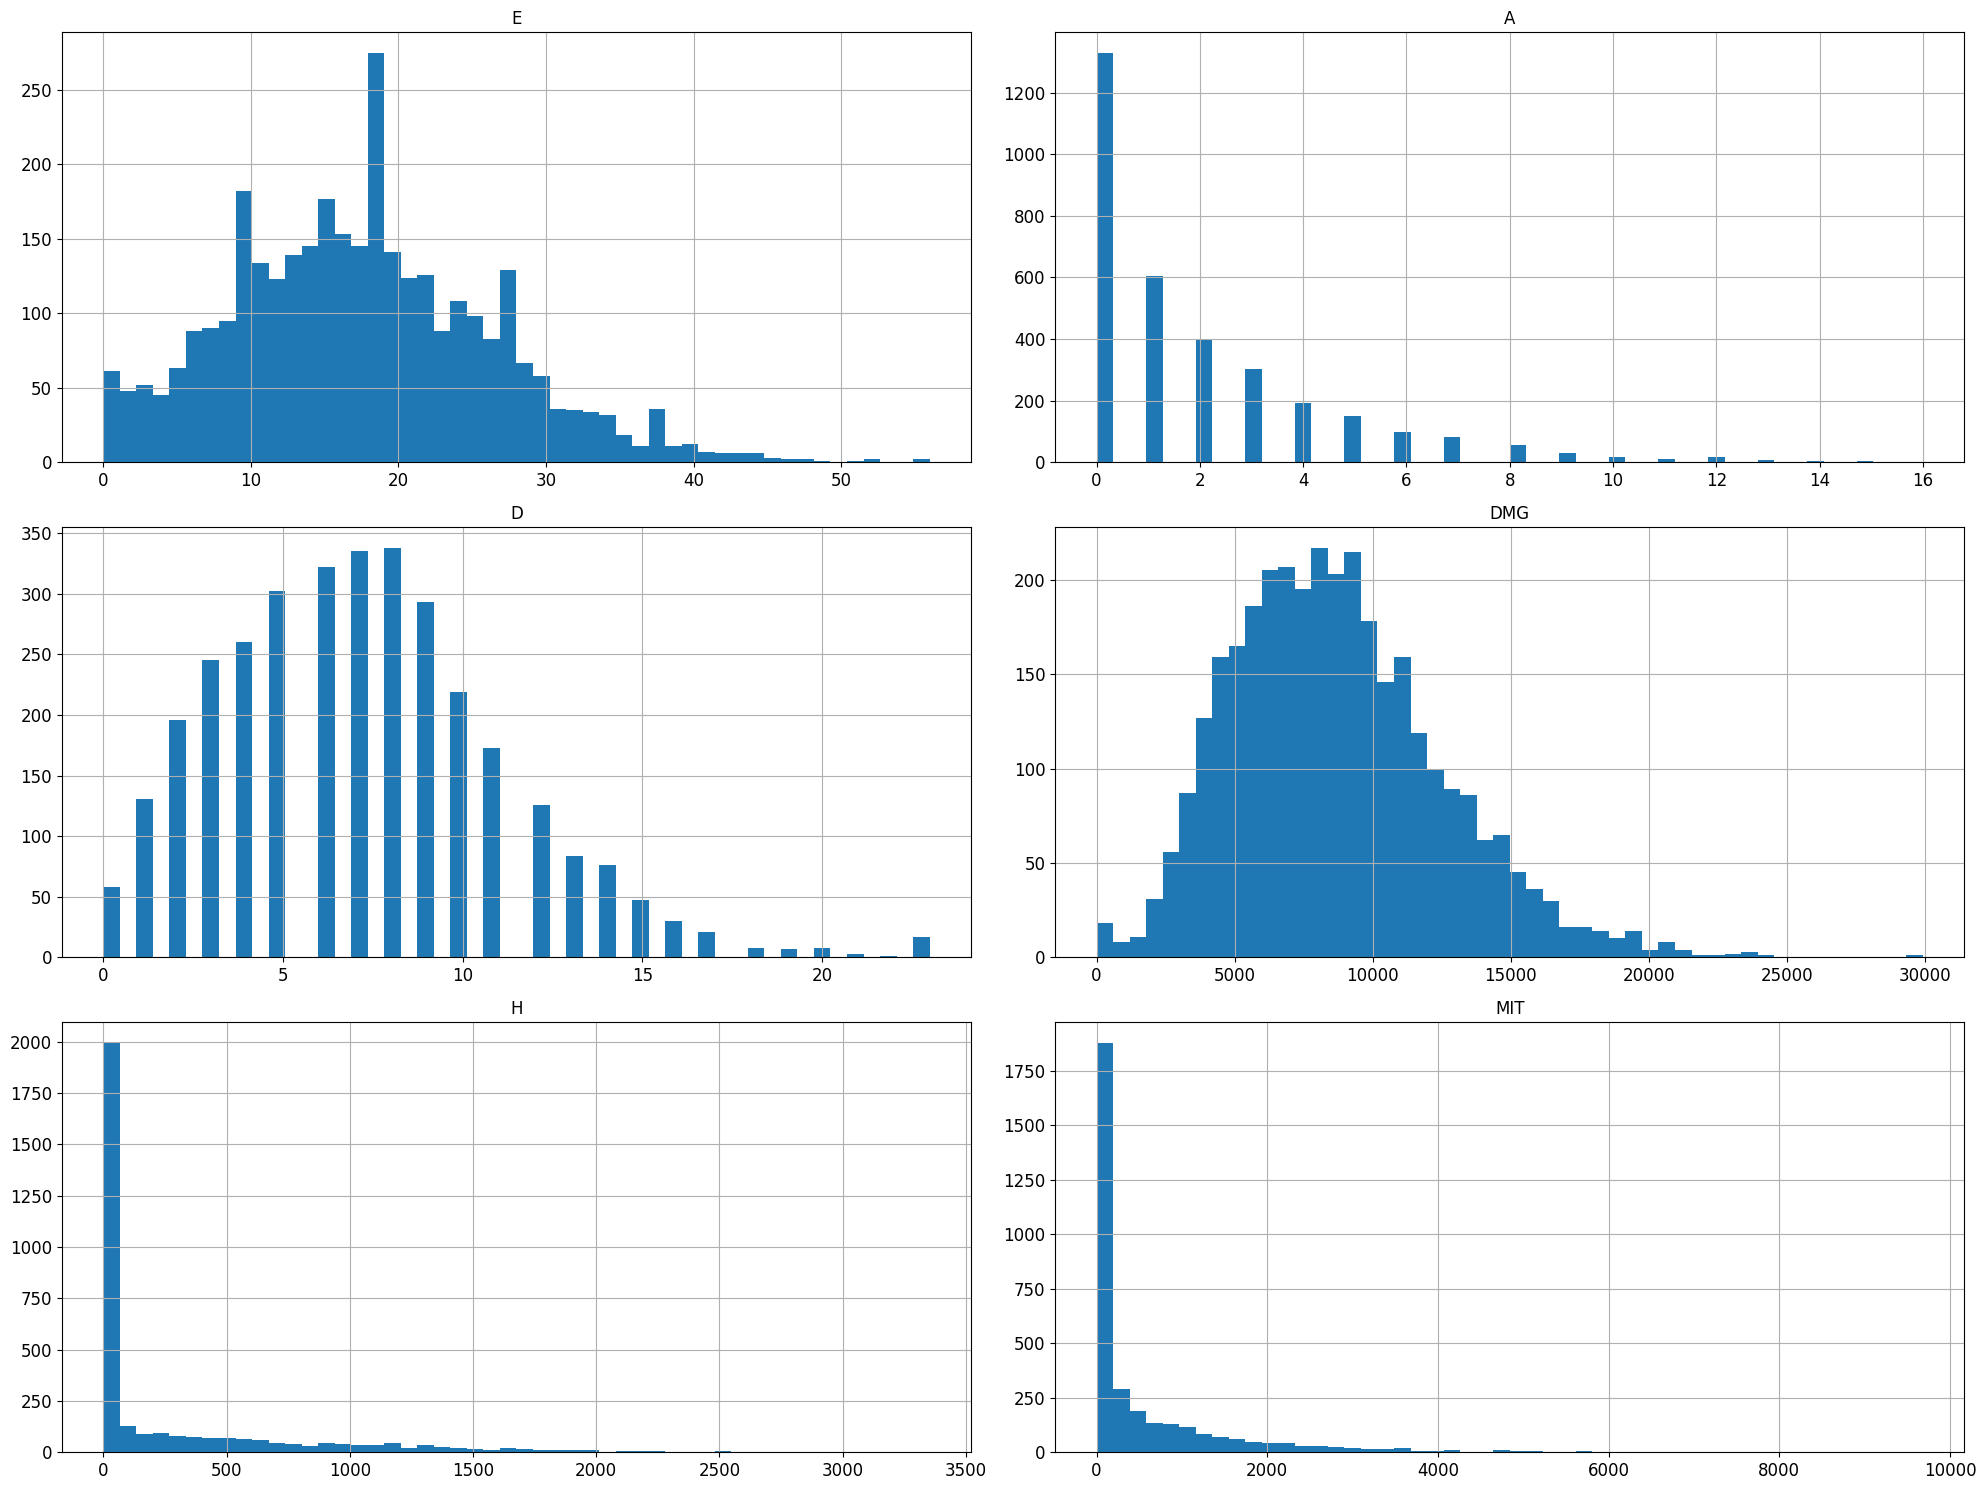

In [11]:
damage.hist(bins=50, figsize=(20, 15))
save_fig('damage_hist')
plt.show()

그림 저장:support_hist


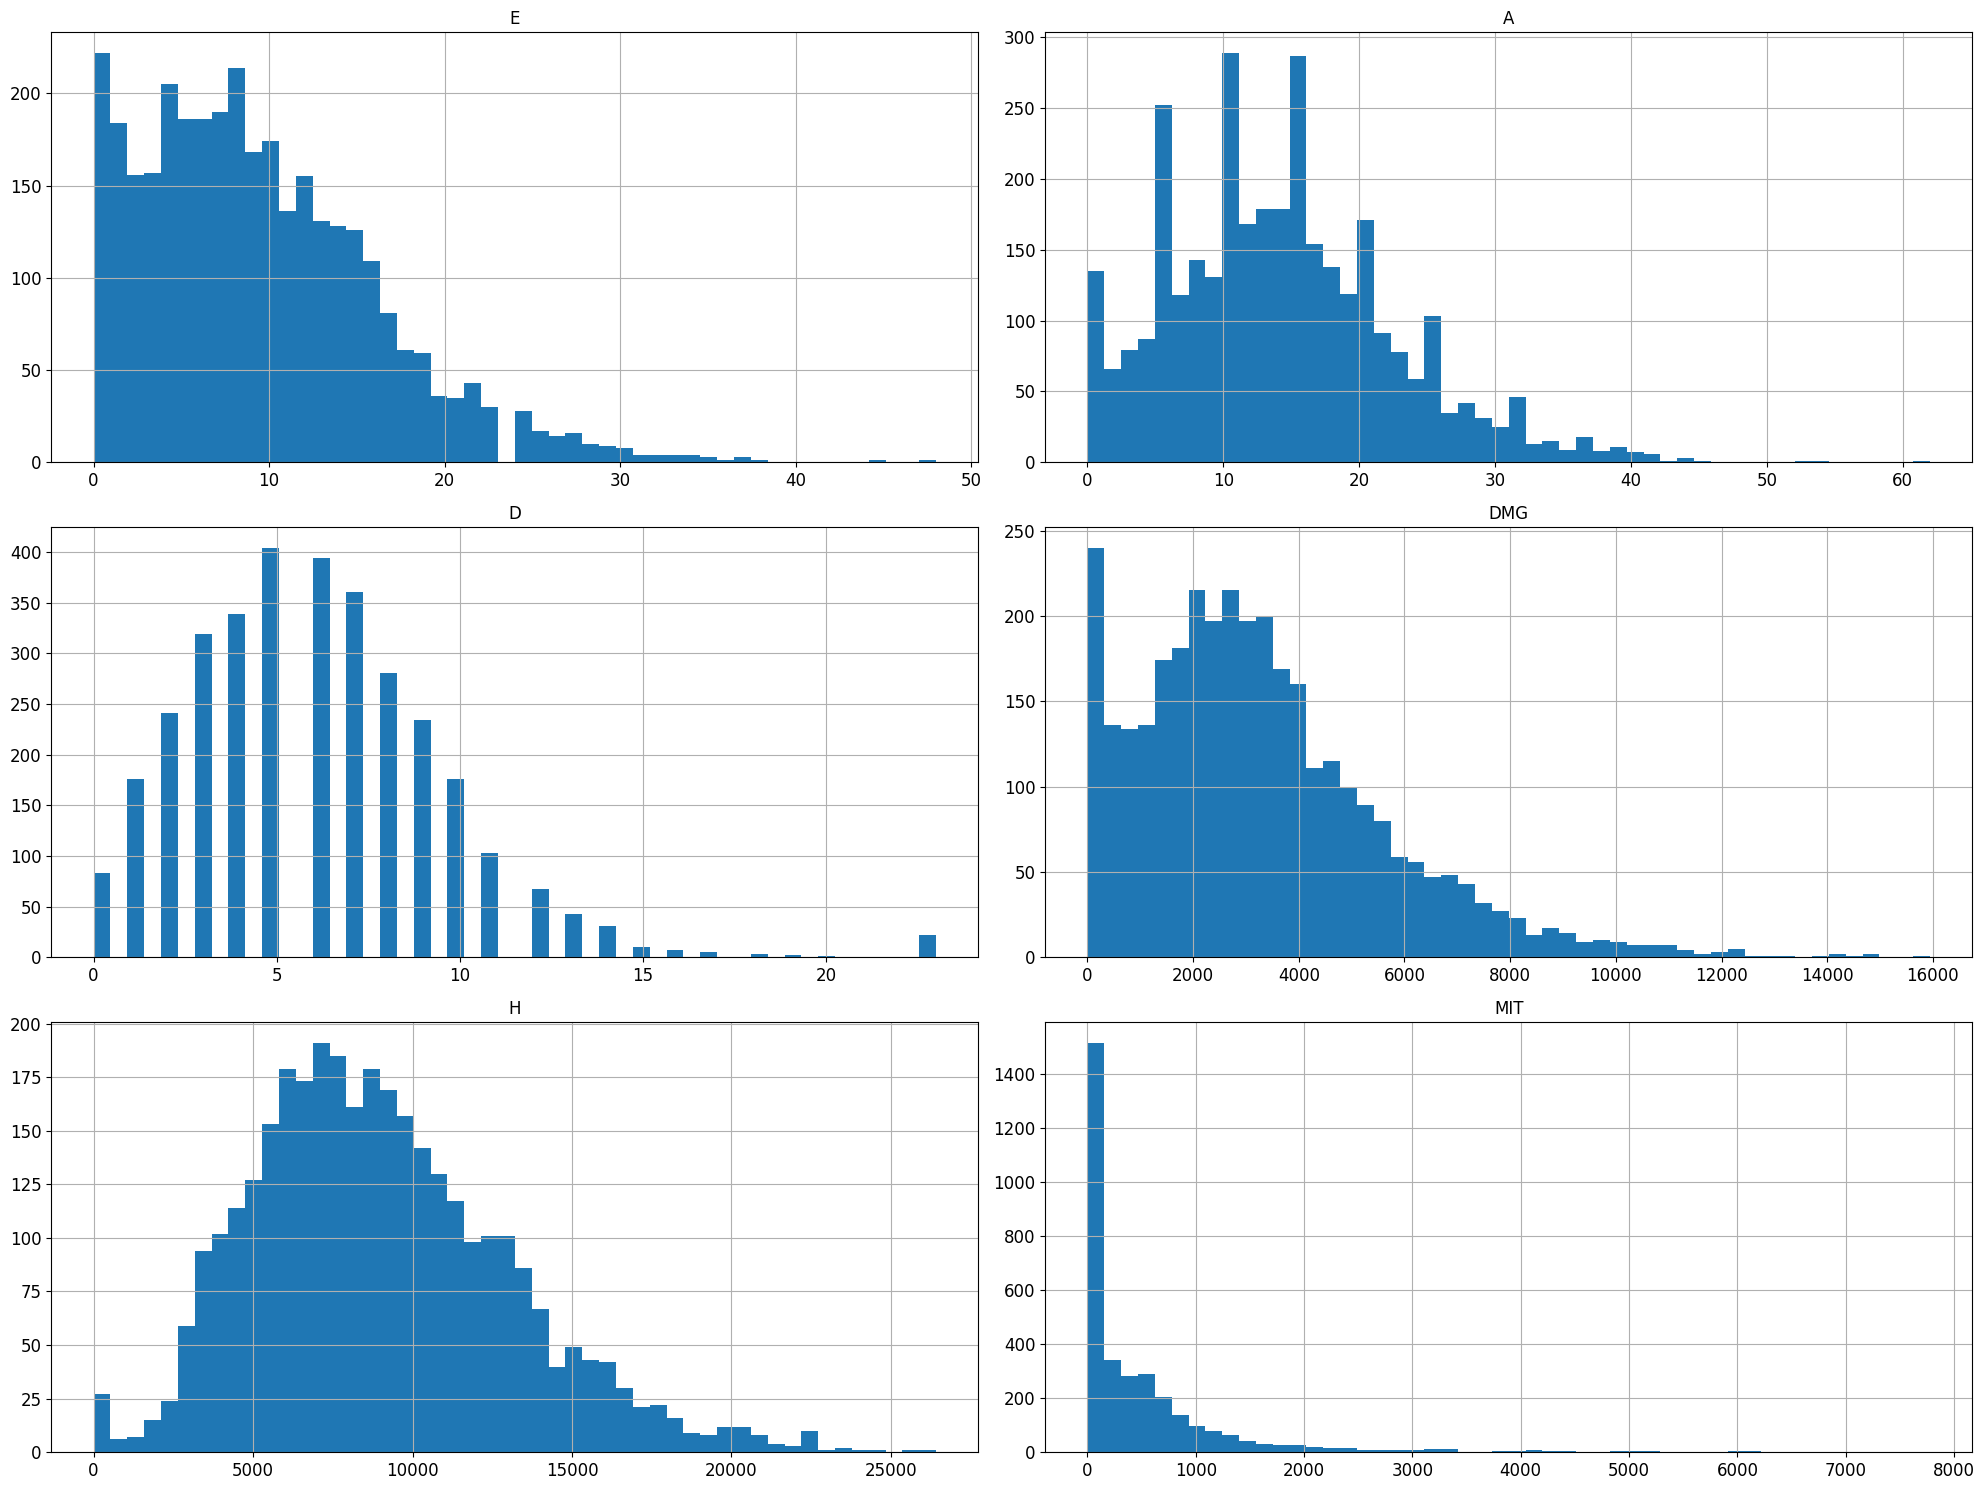

In [12]:
support.hist(bins=50, figsize=(20, 15))
save_fig('support_hist')
plt.show()

In [13]:
from sklearn import utils

scoreboards = scoreboards.loc[utils.shuffle(range(len(scoreboards.index) // players))]
scoreboards

E   A   D   DMG     H   MIT    GAME
139 0  12   1  11  5006     0  9911  DEFEAT
    1   8   0   2  7558     0  3014  DEFEAT
    2  19   8   5  6500  1433     0  DEFEAT
    3   0   0  23     0     0     0  DEFEAT
    4   0   0  23     0     0     0  DEFEAT
...    ..  ..  ..   ...   ...   ...     ...
654 5  18   5   9  5102     0  4115  DEFEAT
    6  22   0  10  9856     0     0  DEFEAT
    7  21   1  10  8803    56  3064  DEFEAT
    8  13  24   8  3619  9342     0  DEFEAT
    9  15  24   4  3783  7817   486  DEFEAT

[8250 rows x 7 columns]

In [14]:
X = scoreboards.drop('GAME', axis=1)
y = scoreboards['GAME'][::players].copy()

In [15]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X)
joblib.dump(scaler, 'scaler.joblib')
X = pd.DataFrame(scaler.transform(X), X.index, X.columns)
X

E         A         D       DMG         H       MIT
139 0  0.206897  0.016129  0.478261  0.167302  0.000000  0.236828
    1  0.137931  0.000000  0.086957  0.252590  0.000000  0.072021
    2  0.327586  0.129032  0.217391  0.217231  0.054241  0.000000
    3  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000
    4  0.000000  0.000000  1.000000  0.000000  0.000000  0.000000
...         ...       ...       ...       ...       ...       ...
654 5  0.310345  0.080645  0.391304  0.170510  0.000000  0.098330
    6  0.379310  0.000000  0.434783  0.329390  0.000000  0.000000
    7  0.362069  0.016129  0.434783  0.294198  0.002120  0.073216
    8  0.224138  0.387097  0.347826  0.120948  0.353609  0.000000
    9  0.258621  0.387097  0.173913  0.126429  0.295886  0.011613

[8250 rows x 6 columns]

In [16]:
features = X.shape[-1]
total_features = players * features
X = X.values.reshape(-1, total_features)
print(X.shape)
print(y.shape)

(825, 60)
(825,)


In [17]:
from sklearn import model_selection, linear_model

cv_iter = 1600
model_selection.cross_val_score(linear_model.LogisticRegressionCV(max_iter=cv_iter), X, y)

array([0.93333333, 0.93939394, 0.94545455, 0.90909091, 0.87272727])

In [18]:
from sklearn import neighbors

radius = 2.
model_selection.cross_val_score(neighbors.RadiusNeighborsClassifier(radius), X, y)

array([0.53333333, 0.55757576, 0.56969697, 0.55757576, 0.55757576])

In [19]:
from sklearn import neural_network

classifier_iter = 3200
model_selection.cross_val_score(neural_network.MLPClassifier(max_iter=classifier_iter), X, y)

array([0.86666667, 0.90909091, 0.93333333, 0.88484848, 0.86666667])

In [20]:
from sklearn import ensemble, svm, tree
import operator

estimators = (
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(n_jobs=-1),
    ensemble.ExtraTreesClassifier(n_jobs=-1),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(n_jobs=-1),
    ensemble.HistGradientBoostingClassifier(),
    linear_model.LogisticRegression(n_jobs=-1),
    linear_model.LogisticRegressionCV(max_iter=cv_iter, n_jobs=-1),
    linear_model.PassiveAggressiveClassifier(n_jobs=-1),
    linear_model.Perceptron(n_jobs=-1),
    linear_model.RidgeClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(n_jobs=-1),
    neighbors.KNeighborsClassifier(n_jobs=-1),
    neighbors.RadiusNeighborsClassifier(radius, n_jobs=-1),
    neighbors.NearestCentroid(),
    neural_network.MLPClassifier(max_iter=classifier_iter),
    svm.LinearSVC(dual='auto'),
    svm.NuSVC(),
    svm.SVC(),
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier()
)
scores = [(estimator, model_selection.cross_val_score(estimator, X, y, n_jobs=-1).mean()) for estimator in estimators]
scores.sort(key=operator.itemgetter(1), reverse=True)
scores

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

[(LogisticRegressionCV(max_iter=1600, n_jobs=-1), 0.9200000000000002),
 (NuSVC(), 0.9199999999999999),
 (LogisticRegression(n_jobs=-1), 0.9151515151515153),
 (ExtraTreesClassifier(n_jobs=-1), 0.9115151515151515),
 (SVC(), 0.9103030303030302),
 (RandomForestClassifier(n_jobs=-1), 0.9042424242424243),
 (KNeighborsClassifier(n_jobs=-1), 0.9030303030303031),
 (NearestCentroid(), 0.9030303030303031),
 (RidgeClassifier(), 0.9006060606060606),
 (RidgeClassifierCV(), 0.8993939393939394),
 (GradientBoostingClassifier(), 0.8969696969696971),
 (LinearSVC(), 0.8969696969696969),
 (HistGradientBoostingClassifier(), 0.8957575757575758),
 (PassiveAggressiveClassifier(n_jobs=-1), 0.8957575757575758),
 (AdaBoostClassifier(), 0.8848484848484848),
 (MLPClassifier(max_iter=3200), 0.8848484848484848),
 (SGDClassifier(n_jobs=-1), 0.8763636363636363),
 (BaggingClassifier(n_jobs=-1), 0.8727272727272727),
 (Perceptron(n_jobs=-1), 0.8666666666666666),
 (DecisionTreeClassifier(), 0.8290909090909091),
 (ExtraTree

In [21]:
defeats = len(defeat) // players


def find_file(index):
    index += 1
    if index <= defeats:
        return f'DEFEAT ({index})'
    else:
        index -= len(victory) // players
        return f'VICTORY ({index})'

In [22]:
for estimator, _ in scores:
    estimator = estimator.fit(X, y)
    if hasattr(estimator, 'feature_importances_'):
        importances = estimator.feature_importances_.reshape(-1, features)
        tanks, damages, supports = [0, 5], [1, 2, 6, 7], [3, 4, 8, 9]
        importances_tank = importances[tanks].sum(0)
        importances_damage = importances[damages].sum(0)
        importances_support = importances[supports].sum(0)
        importances[tanks] = importances_tank / 2
        importances[damages] = importances_damage / 4
        importances[supports] = importances_support / 4
        joblib.dump(importances, 'importances.joblib')

        titles = '처치', '도움', '죽음', '피해', '치유', '경감'

        print('**특성 중요도**')
        for importance, title in sorted(zip(importances.sum(0), titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 역할 중요도**')
        for importance, title in sorted(
                zip(
                    (importances_tank.sum(), importances_damage.sum() / 2, importances_support.sum() / 2),
                    ('돌격', '공격', '지원')
                ),
                reverse=True
        ):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 돌격 특성 중요도**')
        for importance, title in sorted(zip(importances_tank, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 공격 특성 중요도**')
        for importance, title in sorted(zip(importances_damage / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        print('\n**1인 지원 특성 중요도**')
        for importance, title in sorted(zip(importances_support / 2, titles), reverse=True):
            print(f'{title}: {importance:.2f}')

        break

**특성 중요도**
처치: 0.31
죽음: 0.28
도움: 0.19
피해: 0.09
치유: 0.07
경감: 0.06

**1인 역할 중요도**
돌격: 0.26
지원: 0.20
공격: 0.17

**1인 돌격 특성 중요도**
죽음: 0.09
처치: 0.08
도움: 0.04
피해: 0.02
경감: 0.01
치유: 0.01

**1인 공격 특성 중요도**
처치: 0.07
죽음: 0.04
피해: 0.02
도움: 0.02
경감: 0.01
치유: 0.01

**1인 지원 특성 중요도**
도움: 0.06
죽음: 0.05
처치: 0.04
치유: 0.02
피해: 0.01
경감: 0.01


In [23]:
defeats = defeat.index.stop
for i in range(defeats - 10, defeats - 101, -players):
    defeat_i = defeat[i:i + players]
    print(f'DEFEAT ({i // players + 1})')
    print(defeat_i)
    contributions = scaler.transform(defeat_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

DEFEAT (424)
       E   A   D    DMG     H    MIT     GAME
4230  13   3   2   7719     0  10963   DEFEAT
4231   9   1   7   4328    70      0   DEFEAT
4232   4   0  10   5910   845    149   DEFEAT
4233   6   4   7   4738  7087    358   DEFEAT
4234   2  12   8   1360  7392      0   DEFEAT
4235  23   8   2  10991     0   6197  VICTORY
4236  11   1   5   8849     0      0  VICTORY
4237  13   0   6   5569   387    232  VICTORY
4238  10  15   3   2747  6163    230  VICTORY
4239  11  13   3   2717  7885      0  VICTORY
TEAM 1: 0.93 0.97 0.73 0.83 0.84
TEAM 2: 1.07 1.17 1.14 1.17 1.16

DEFEAT (423)
       E   A   D    DMG      H    MIT     GAME
4220  25   6   8  11276      0   7721   DEFEAT
4221  25   0   4   7528      0      0   DEFEAT
4222  17   2  11  12213      0    288   DEFEAT
4223  12  13  12   2946   8467   1382   DEFEAT
4224  16  24   9   6181  14934      0   DEFEAT
4225  29   5   8  12875     98  13387  VICTORY
4226  28   0   7  12405   1468     90  VICTORY
4227  25   5   5   7763  

In [24]:
victorys = victory.index.stop
for i in range(victorys - 10, victorys - 101, -players):
    victory_i = victory[i:i + players]
    print(f'VICTORY ({i // players + 1})')
    print(victory_i)
    contributions = scaler.transform(victory_i.drop(['GAME'], axis=1))
    contributions[:, 2] = 1 - contributions[:, 2]
    contributions *= importances
    contributions = contributions.sum(1)
    contributions[tanks] *= 2 / contributions[tanks].sum()
    contributions[damages] *= 4 / contributions[damages].sum()
    contributions[supports] *= 4 / contributions[supports].sum()
    print(f'TEAM 1:', end='')
    for contribution in contributions[:5]:
        print(f' {contribution:.2f}', end='')
    print(f'\nTEAM 2:', end='')
    for contribution in contributions[5:]:
        print(f' {contribution:.2f}', end='')
    print('\n')

VICTORY (401)
       E   A   D    DMG      H    MIT     GAME
4000  19  11   3   8783      0  17238  VICTORY
4001  19   2   9  10958      0      0  VICTORY
4002  27   3   4  14615      0      0  VICTORY
4003   8   3   6   6028   9502      0  VICTORY
4004  10   6   7   4942   7322      0  VICTORY
4005  12   1   6  10194      0  13539   DEFEAT
4006  11   0  10   8942    467    147   DEFEAT
4007  11   3  12   6593    415      0   DEFEAT
4008   5   7   4   2534  13197    689   DEFEAT
4009   3   6   7   3790   9426   2477   DEFEAT
TEAM 1: 1.13 1.05 1.45 0.98 0.99
TEAM 2: 0.87 0.79 0.71 1.11 0.92

VICTORY (400)
       E   A   D    DMG      H    MIT     GAME
3990  31   4   6  16242      0  22411  VICTORY
3991  30   6   6  15608      0      0  VICTORY
3992  34   4   6  16219      0    294  VICTORY
3993   8  25   7   1695  13339    767  VICTORY
3994  18  13   7   3377  10081      0  VICTORY
3995  14   6  10   8357      0  14073   DEFEAT
3996  19   0  14  11045   1454    924   DEFEAT
3997  17   1

In [25]:
from tensorflow.keras import backend, layers
from tensorflow import keras

backend.clear_session()
model = keras.Sequential()
model.add(keras.Input((total_features,)))
model.add(layers.Dense(300, 'relu'))
model.add(layers.Dense(100, 'relu'))
model.add(layers.Dense(1, 'sigmoid'))
model.summary()

2024-09-06 07:15:42.622640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-06 07:15:42.652926: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-06 07:15:42.662599: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-06 07:15:42.716928: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1725606945.187055    1539 cuda_executor.c

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 300)            │        18,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,501 (189.46 KB)

 Trainable params: 48,501 (189.46 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
from tensorflow.keras import optimizers, callbacks

model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
transform = preprocessing.LabelEncoder().fit_transform(y)
stopping = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    X,
    transform,
    epochs=256,
    callbacks=[stopping],
    validation_split=.25
)
history.history['val_loss'][-11], history.history['val_accuracy'][-11]

Epoch 1/256


I0000 00:00:1725606946.214579    2310 service.cc:146] XLA service 0x7fc21c006220 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1725606946.214800    2310 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-09-06 07:15:46.251088: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-06 07:15:46.377161: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-09-06 07:15:47.404249: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_37', 36 bytes spill stores, 36 bytes spill loads

2024-09-06 07:15:47.518508: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in funct

 1/20 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.7188 - loss: 0.6876

I0000 00:00:1725606948.358440    2310 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.6578 - loss: 0.6880 - val_accuracy: 0.7053 - val_loss: 0.6833
Epoch 2/256
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7957 - loss: 0.6817 - val_accuracy: 0.7778 - val_loss: 0.6762
Epoch 3/256
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8258 - loss: 0.6737 - val_accuracy: 0.8502 - val_loss: 0.6693
Epoch 4/256
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8981 - loss: 0.6684 - val_accuracy: 0.8599 - val_loss: 0.6629
Epoch 5/256
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8969 - loss: 0.6633 - val_accuracy: 0.8696 - val_loss: 0.6569
Epoch 6/256
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9052 - loss: 0.6563 - val_accuracy: 0.8696 - val_loss: 0.6511
Epoch 7/256
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9035 - loss: 0.6527 - val_accuracy: 0.8744 - val_loss: 0.6453
Epoch 8/256
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9066 - loss: 0.6448 - val_accuracy: 0.8647 - val_loss: 0

(0.2818871736526489, 0.8888888955116272)